In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPool2D
from tensorflow.keras.utils import to_categorical
import os
import cv2

In [7]:
# pip install opencv-python

In [3]:
image_size=200

In [4]:
path1=r'D:\cats_dogs_data\dataset\test_set'
cate=['cats','dogs']
# here we read row images


In [5]:

for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        print(image_path)


D:\cats_dogs_data\dataset\test_set\cats\cat.4001.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4002.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4003.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4004.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4005.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4006.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4007.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4008.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4009.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4010.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4011.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4012.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4013.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4014.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4015.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4016.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4017.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.4018.jpg
D:\cats_dogs_data\dataset\test_set\cats\cat.40

D:\cats_dogs_data\dataset\test_set\dogs\dog.4019.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4020.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4021.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4022.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4023.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4024.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4025.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4026.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4027.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4028.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4029.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4030.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4031.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4032.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4033.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4034.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4035.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.4036.jpg
D:\cats_dogs_data\dataset\test_set\dogs\dog.40

Value of label is  0
Value of label is  1


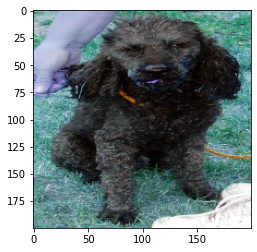

In [6]:
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)
    print('Value of label is ', label)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array, (image_size,image_size))
        plt.imshow(image_array)
        input_image.append([image_array,label])
    
#here we are joining two paths so that it will be easy for us

In [7]:
len(input_image)

1709

In [8]:
np.random.shuffle(input_image)

In [9]:
# till here x and y values are together and we  have to separate them

In [10]:
input_image[1]

[array([[[  7,   6,  10],
         [  9,   8,  12],
         [ 10,   9,  13],
         ...,
         [ 61,  60,  69],
         [ 62,  61,  70],
         [102, 101, 110]],
 
        [[  6,   4,   8],
         [  7,   6,  10],
         [  8,   7,  11],
         ...,
         [ 61,  60,  69],
         [ 62,  61,  70],
         [101, 100, 109]],
 
        [[  4,   3,   7],
         [  5,   4,   8],
         [  6,   5,   9],
         ...,
         [ 61,  60,  69],
         [ 62,  61,  70],
         [101, 100, 109]],
 
        ...,
 
        [[  1,   1,   0],
         [  0,   0,   0],
         [  2,   2,   2],
         ...,
         [ 22,  19,  21],
         [ 28,  25,  27],
         [ 36,  33,  35]],
 
        [[  0,   1,   0],
         [  0,   0,   0],
         [  2,   2,   2],
         ...,
         [ 22,  18,  20],
         [ 26,  23,  25],
         [ 37,  34,  36]],
 
        [[  1,   2,   1],
         [  0,   0,   0],
         [  1,   1,   1],
         ...,
         [ 24,  21,  23],
  

In [11]:
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [12]:
X=np.array(X)
Y=np.array(Y)

In [13]:
X.shape

(1709, 200, 200, 3)

In [14]:
Y.shape

(1709,)

In [15]:
Y

array([0, 0, 0, ..., 0, 0, 0])

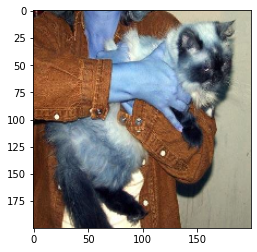

In [16]:
plt.imshow(X[2])

In [17]:
# 0 is cat 1 is dog

In [18]:
X=X/255

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=14,kernel_size=(5,5),input_shape=(200,200,3),activation='relu',padding='same'))           
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

In [21]:
model.add(Dense(2,activation='softmax'))

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X,Y,epochs=15,batch_size=15,validation_split=0.2)  # epochs = iterations 

Epoch 1/15
92/92 [==============================] - 76s 716ms/step - loss: 2.6973 - accuracy: 0.5230 - val_loss: 0.6662 - val_accuracy: 0.6082
Epoch 2/15
92/92 [==============================] - 65s 706ms/step - loss: 0.6552 - accuracy: 0.6079 - val_loss: 0.6531 - val_accuracy: 0.6316
Epoch 3/15
92/92 [==============================] - 67s 725ms/step - loss: 0.6220 - accuracy: 0.6554 - val_loss: 0.7197 - val_accuracy: 0.5819
Epoch 4/15
92/92 [==============================] - 71s 774ms/step - loss: 0.5347 - accuracy: 0.7498 - val_loss: 0.6439 - val_accuracy: 0.6374
Epoch 5/15
92/92 [==============================] - 66s 721ms/step - loss: 0.3735 - accuracy: 0.8595 - val_loss: 0.6780 - val_accuracy: 0.6520
Epoch 6/15
92/92 [==============================] - 65s 706ms/step - loss: 0.2307 - accuracy: 0.9261 - val_loss: 0.7341 - val_accuracy: 0.6374
Epoch 7/15
92/92 [==============================] - 63s 688ms/step - loss: 0.1239 - accuracy: 0.9671 - val_loss: 0.8384 - val_accuracy: 0.6023

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 14)      1064      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 14)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 140000)            0         
                                                                 
 dense (Dense)               (None, 128)               17920128  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17,921,450
Trainable params: 17,921,450
Non-trainable params: 0
____________________________________________

In [25]:
pred_values=model.predict(X)

54/54 [==============================] - 28s 476ms/step


In [26]:
pred_values

array([[9.9809808e-01, 1.9019255e-03],
       [9.9939334e-01, 6.0662965e-04],
       [9.9649459e-01, 3.5054570e-03],
       ...,
       [9.9333823e-01, 6.6618309e-03],
       [1.2893045e-03, 9.9871075e-01],
       [9.9146819e-01, 8.5318657e-03]], dtype=float32)

In [27]:
pred_classes=np.argmax(pred_values,axis=1)

In [28]:
pred_classes

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [29]:
#next step of prediction evaluation using sklearn metrics

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
catdog_cf=confusion_matrix(Y,pred_classes)

In [32]:
catdog_cf

array([[934,  66],
       [ 61, 648]], dtype=int64)

In [33]:
accuracy_score(Y,pred_classes)*100

92.56875365710943

# Model Checking

1/1 [==============================] - 0s 47ms/step
[[ True False]]
Our model says it is a cat


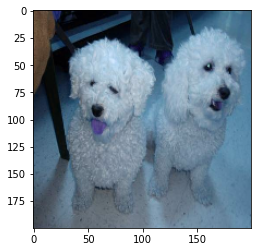

In [40]:
idx=random.randint(0,len(Y))
plt.imshow(X[idx,:])
plt.show

Y_pred=model.predict(X[idx,:].reshape(1,200,200,3))
Y_pred=Y_pred>0.5

print(Y_pred)
if Y_pred[0][0]==True and Y_pred[0][1]==False:
    print("Our model says it is a cat")
else:
    print("Our model says it is a dog")